# Data Mining Assignment
## By: Nikolaos Gournakis
### Student ID: it22023

# Introduction
This report is an analysis of the process of cleaning and filling-in the dataset given for the assignment and the training of the models for classification of movies into `Won Oscar`/`Not Won Oscar` and clustering.
<Br>

Even thought the report is presented as a Jupyter Notebook. I did the actual process as a python project with multiple modules and a file structure. I did this because I prefer the software development workflow and I find it easier to work with. Even though I do explain everything in the report, I suggest you also take a look at the code in the project (comments are included).

# A) Data Preprocessing
The first part of the assignment is split into three parts:
1. Data Cleaning: handling missing values, renaming columns, etc.
2. Data Scrapping for filling in missing values of the dataset
3. Filling in the data from the second part and also transform data to a more desirable/usable format
<p> To start with part 1 (Data Cleaning), I took a look for general properties of the data </p>

##### Note: The code for this part of the assignment is in the file `preprocessing.py`,`cleaning.py`

In [1]:
import warnings

import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_excel("data/movies.xlsx")
df.head()

,Film,Year,Script Type,Rotten Tomatoes critics,Metacritic critics,Average critics,Rotten Tomatoes Audience,Metacritic Audience,Rotten Tomatoes vs Metacritic deviance,Average audience,Audience vs Critics deviance,Primary Genre,Genre,Opening Weekend,Opening weekend ($million),Domestic Gross,Domestic gross ($million),Foreign Gross ($million),Foreign Gross,Worldwide Gross,Worldwide Gross ($million),of Gross earned abroad,Budget ($million),Budget recovered,Budget recovered opening weekend,Distributor,IMDb Rating,IMDB vs RT disparity,Release Date (US),Oscar Winners,Oscar Detail
0,300,2007,adaptation,60,51,56,89.0,71,18,80,-25,action,"period, action",70885301,70.89,210614939,210.61,245.45,245453242,456068181,456.0,53.82%,65,701.64%,109.05%,NaN,NaN,NaN,"Mar 9, 2007",NaN,NaN
1,3:10 to Yuma,2007,remake,88,76,82,86.0,73,13,80,3,western,western,14035033,14.04,53606916,53.61,16.17,16173815,69780731,70.0,23.18%,50,139.56%,28.07%,NaN,NaN,NaN,"Sep 7, 2007",NaN,NaN
2,30 Days of Night,2007,adaptation,50,53,52,56.0,65,-9,61,-9,horror,horror,15951902,15.95,39568996,39.57,35.53,35526091,75095087,75.0,47.31%,32,234.67%,49.85%,NaN,NaN,NaN,"Oct 19, 2007",NaN,NaN
3,Across the Universe,2007,original screenplay,54,56,55,82.0,73,9,78,-23,musical,musical,3824988,3.82,24343673,24.34,5.02,5023470,29367143,29.0,17.11%,45,65.26%,8.50%,NaN,NaN,NaN,"Oct 12, 2007",NaN,NaN
4,Alien vs. Predator - Requiem,2007,sequel,14,29,22,31.0,45,-14,38,-17,sci-fi,"sci-fi, horror",10059425,10.06,41797066,41.80,87.09,87086650,128883716,129.0,67.57%,40,322.21%,25.15%,NaN,NaN,NaN,"Dec 25, 2007",NaN,NaN


In [2]:
df.columns

Index(['Film', 'Year', 'Script Type', 'Rotten Tomatoes  critics',
       'Metacritic  critics', 'Average critics ', 'Rotten Tomatoes Audience ',
       'Metacritic Audience ', 'Rotten Tomatoes vs Metacritic  deviance',
       'Average audience ', 'Audience vs Critics deviance ', 'Primary Genre',
       'Genre', 'Opening Weekend', 'Opening weekend ($million)',
       'Domestic Gross', 'Domestic gross ($million)',
       'Foreign Gross ($million)', 'Foreign Gross', 'Worldwide Gross',
       'Worldwide Gross ($million)', ' of Gross earned abroad',
       'Budget ($million)', ' Budget recovered',
       ' Budget recovered opening weekend', 'Distributor', 'IMDb Rating',
       'IMDB vs RT disparity', 'Release Date (US)', 'Oscar Winners',
       'Oscar Detail'],
      dtype='object')

### General Observations About Columns
<ol>
<li>
Some are duplicates of others but in different format, example: <code>Domestic Gross</code> , <code>Domestic gross ($million)</code> is the same thing but with a different unit of measurement.
</li>
<li>
Some columns are calculable (<code>Average audience</code>,<code>Budget recovered</code>,etc.), so in order to avoid mistakes in the dataset, we drop these columns and we recalculate them.
</li>
</ol>

### Columns dropped because of the reasons above
<table>
<tr>
    <th>Column Dropped</th>
    <th>Reason</th>
</tr>
<tr>
    <td>DOMESTIC GROSS (\$MILLION)</td>
    <td>Duplicate</td>
</tr>
<tr><td>FOREIGN GROSS (\$MILLION)</td><td>Duplicate</td></tr>
<tr><td>OPENING WEEKEND (\$MILLION)</td><td>Duplicate</td></tr>
<tr><td>WORLDWIDE GROSS (\$MILLION)</td><td>Duplicate</td></tr>
<tr><td>OF GROSS EARNED ABROAD</td><td>Calculable</td></tr>
<tr><td>ROTTEN TOMATOES VS METACRITIC  DEVIANCE</td><td>Calculable</td></tr>
<tr><td>AVERAGE AUDIENCE</td><td>Calculable</td></tr>
<tr><td>AVERAGE CRITICS</td><td>Calculable</td></tr>
<tr><td>ROTTEN TOMATOES VS METACRITIC  DEVIANCE</td><td>Calculable</td></tr>
<tr><td>BUDGET RECOVERED OPENING WEEKEND</td><td>Calculable</td></tr>
<tr><td>BUDGET RECOVERED</td><td>Calculable</td></tr>
<tr><td>AUDIENCE VS CRITICS DEVIANCE</td><td>Calculable</td></tr>

</table>

In [3]:
df.drop(columns=['Average critics ', 'Rotten Tomatoes vs Metacritic  deviance',
       'Average audience ', 'Audience vs Critics deviance ','Opening weekend ($million)','Domestic gross ($million)',
       'Foreign Gross ($million)','Worldwide Gross ($million)', ' of Gross earned abroad', ' Budget recovered',' Budget recovered opening weekend'],inplace=True)

### Observations About Column Names
- Naming is not very consistent across columns (trailing/leading spaces, two adjacent spaces).
- Column names might not be very descriptive, or not descriptive enough
- Undesirable character for code, it might be tedious to write `Worldwide Gross ($million)` in code multiple times

## Renaming of Columns

<p>Renaming each column follows a ruleset that I came up with for consistency, readability and descriptiveness:</p>

- All letters are upper case
- All spaces are replaced by an underscore
- If the column name contains part of a brand name, it becomes abbreviated (e.g., Metacritic => MC, Rotten Tomatoes => RT)
- Percentage Symbols added were appropriate
- (Rarely Used) If a column name is undesirable/non-descriptive, then a more appropriate name is chosen

###### Note: Some columns are missing from the table, they will be addressed later
<table>
<tr>
<th>Column Before</th>
<th>Column After</th>
</tr>
<tr><td>FILM</td><td>TITLE</td></tr>
<tr><td>YEAR</td><td>RELEASE_YEAR</td></tr>
<tr><td>SCRIPT TYPE</td><td>SCRIPT_TYPE</td></tr>
<tr><td>ROTTEN TOMATOES  CRITICS</td><td>RT_CRITICS</td></tr>
<tr><td>METACRITIC  CRITICS</td><td>MC_CRITICS</td></tr>
<tr><td>AVERAGE CRITICS</td><td>AVERAGE_CRITICS</td></tr>
<tr><td>ROTTEN TOMATOES AUDIENCE</td><td>RT_AUDIENCE</td></tr>
<tr><td>METACRITIC AUDIENCE</td><td>MC_AUDIENCE</td></tr>
<tr><td>ROTTEN TOMATOES VS METACRITIC  DEVIANCE</td><td>RT_MC_AUDIENCE_DIFFERENCE</td></tr>
<tr><td>AVERAGE AUDIENCE</td><td>AVERAGE_AUDIENCE</td></tr>
<tr><td>AUDIENCE VS CRITICS DEVIANCE</td><td>CRITICS_AUDIENCE_DIFFERENCE</td></tr>
<tr><td>PRIMARY GENRE</td><td>PRIMARY_GENRE</td></tr>
<tr><td>GENRE</td><td>GENRE</td></tr>
<tr><td>OPENING WEEKEND</td><td>OPENING_WEEKEND</td></tr>
<tr><td>DOMESTIC GROSS</td><td>DOMESTIC_GROSS</td></tr>
<tr><td>FOREIGN GROSS</td><td>FOREIGN_GROSS</td></tr>
<tr><td>WORLDWIDE GROSS</td><td>WORLDWIDE_GROSS</td></tr>
<tr><td>OF GROSS EARNED ABROAD</td><td>%OF_GROSS_EARNED_ABROAD</td></tr>
<tr><td>BUDGET (\$MILLION)</td><td>BUDGET</td></tr>
<tr><td>BUDGET RECOVERED</td><td>%BUDGET_RECOVERED</td></tr>
<tr><td>BUDGET RECOVERED OPENING WEEKEND</td><td>%BUDGET_RECOVERED_OPENING_WEEKEND</td></tr>
<tr><td>IMDB RATING</td><td>IMDB_RATING</td></tr>
<tr><td>IMDB VS RT DISPARITY</td><td>IMDB_RT_DIFFERENCE</td></tr>
<tr><td>OSCAR WINNERS</td><td>WON_OSCAR</td></tr>
<tr><td>OSCAR DETAIL</td><td>OSCAR_DETAILS</td></tr>
</table>

In [4]:
df.columns = [x.upper().strip() for x in df.columns]
try:
       df.rename(columns=
        {'FILM': 'TITLE',
         'YEAR': 'RELEASE_YEAR',
         'SCRIPT TYPE': 'SCRIPT_TYPE',
         'ROTTEN TOMATOES  CRITICS': 'RT_CRITICS',
         'METACRITIC  CRITICS': 'MC_CRITICS',
         'ROTTEN TOMATOES AUDIENCE': 'RT_AUDIENCE',
         'METACRITIC AUDIENCE': 'MC_AUDIENCE',
         'PRIMARY GENRE': 'PRIMARY_GENRE',
         'OPENING WEEKEND': 'OPENING_WEEKEND',
         'DOMESTIC GROSS': 'DOMESTIC_GROSS',
         'FOREIGN GROSS': 'FOREIGN_GROSS',
         'WORLDWIDE GROSS': 'WORLDWIDE_GROSS',
         'BUDGET ($MILLION)': 'BUDGET',
         'IMDB RATING': 'IMDB_RATING',
         'IMDB VS RT DISPARITY': 'IMDB_RT_DIFFERENCE',
         'OSCAR WINNERS': 'WON_OSCAR',
         'OSCAR DETAIL': 'OSCAR_DETAILS'},
               inplace=True)
except Exception as e:
     print(e)

In [5]:
na_columns = df.isna().sum()
na_columns[na_columns > 0]

RT_CRITICS               1
RT_AUDIENCE              1
PRIMARY_GENRE         1383
GENRE                    1
DISTRIBUTOR           1402
IMDB_RATING           1402
IMDB_RT_DIFFERENCE    1402
WON_OSCAR             1346
OSCAR_DETAILS         1346
dtype: int64

### Observations About Missing Values
We know that the length of the dataset is 1402 rows, and we can see that the columns `Distributor`,`IMDb Rating` ,`IMDB vs RT disparity`,`Oscar Winners`,`Oscar Detail`,`Primary Genre` have way too many missing values.
<Br>
#### Distributor
Distributor is a column that is not very easily filled, so we drop it.
<hr>

#### IMDb Rating
IMDb Rating is a column that we can fill with outside data, we will see later how we fill this column.
<hr>

#### IMDb vs RT Disparity
The same goes for this column, it will be calculated at the same time.
<hr>

#### Oscar Winners
The missing values can be interpreted as "No Oscar Won" or an actual missing value. We assume that NaN means "No Oscar Won" and we fill the missing values with `False`.
<hr>

#### Oscar Detail
The missing values can be interpreted as "No Oscar Won" or an actual missing value. We assume that NaN means "No Oscar Won".
<hr>

#### Primary Genre
The number of values in the column `Primary Genre` is very low, and I don't find it as a crucial column, as there is a column `Genre` that I go way more in depth into, so we drop `Primary Genre`.
 

In [6]:
df.drop(columns=["DISTRIBUTOR","PRIMARY_GENRE"],inplace=True)

In [7]:
df.dtypes

TITLE                  object
RELEASE_YEAR            int64
SCRIPT_TYPE            object
RT_CRITICS             object
MC_CRITICS             object
RT_AUDIENCE           float64
MC_AUDIENCE            object
GENRE                  object
OPENING_WEEKEND        object
DOMESTIC_GROSS         object
FOREIGN_GROSS          object
WORLDWIDE_GROSS        object
BUDGET                 object
IMDB_RATING           float64
IMDB_RT_DIFFERENCE    float64
RELEASE DATE (US)      object
WON_OSCAR              object
OSCAR_DETAILS          object
dtype: object

### Observations About Data Types
- `RT_CRITICS`, `MC_CRITICS`, `MC_AUDIENCE` , `OPENING_WEEKEND`, `DOMESTIC_GROSS`, `FOREIGN_GROSS`, `WORLDWIDE_GROSS`, `BUDGET` are all of type `object` when they should be of type `float64` or `int64`.
- `WON_OSCAR` is of type `object` when it should be of type `bool`.

This might indicate that the columns either have strings instead of numbers, or that they were mistyped or that they might have been entered into the dataset in a different format. So we will check each column individually.

In [8]:
# Trying to cast `RT_CRITICS` to `float64` excepting an error to help us find the problem-values
try:
    df["RT_CRITICS"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '-'


We can see one of the problem-values of `RT_CRITICS` is `-` which was probably entered either by mistake, or it was a missing value. We will replace with `NaN` and then we will cast the column to `float64`.

In [9]:
def clean_general_float(x):
    if isinstance(x, str):
        if x == '-':
            return pd.NA
    if pd.isna(x):
        return x
    return float(x)

We create this general function to clean floats, and we apply it to `RT_CRITICS`. This will result in the column having some floats and some `NaN` values. So to cast the column to `int64` we will need to handle the `NaN` values. I decided to fill the `NaN` values with the mean of the column.

In [10]:
df['RT_CRITICS'] = df['RT_CRITICS'].apply(lambda x: clean_general_float(x))
df['RT_CRITICS'] = df['RT_CRITICS'].fillna(df['RT_CRITICS'].mean())
df['RT_CRITICS'] = df['RT_CRITICS'].apply(lambda x: int(x))
df['RT_CRITICS'].dtype

dtype('int64')

In [11]:
# Trying to cast `MC_CRITICS` to `float64` excepting an error to help us find the problem-values
try:
    df["MC_CRITICS"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '-'


In [12]:
df['MC_CRITICS'].unique()

array([51, 76, 53, 56, 29, 39, 54, 59, 64, 69, 13, 62, 33, 75, 17, 37, 45,
       35, 19, 77, 81, 47, 28, 46, 65, 73, 85, 25, 61, 82, 48, 42, 91, 50,
       27, 96, 44, 36, 49, 58, 74, 83, 67, 32, 80, 92, 41, 63, 78, 94, 84,
       86, 79, 70, 31, 34, 40, 71, 43, 55, 57, 24, 26, 66, 30, 72, 52, 9,
       60, 68, 15, 20, 88, 38, 23, 21, 95, 22, 18, 90, 89, 87, 97, 11,
       100, 12, 16, 93, 99, '-'], dtype=object)

In [13]:
# We can see the same problem-value as before, so we will apply the same strategy
df['MC_CRITICS'] = df['MC_CRITICS'].apply(lambda x: clean_general_float(x))
df['MC_CRITICS'] = df['MC_CRITICS'].fillna(df['MC_CRITICS'].mean())
df['MC_CRITICS'] = df['MC_CRITICS'].apply(lambda x: int(x))
df['MC_CRITICS'].dtype

dtype('int64')

In [14]:
# Trying to cast `MC_AUDIENCE` to `float64` excepting an error to help us find the problem-values 
try:
    df["MC_AUDIENCE"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '-'


In [15]:
df['MC_AUDIENCE'].unique()

array([71, 73, 65, 45, 55, 75, 64, 63, 70, 69, 19, 81, 29, 83, 21, 47, 38,
       41, 80, 57, 35, 50, 53, 82, 67, 46, 51, 66, 78, 88, 56, 59, 76, 43,
       68, 48, 61, 86, 60, 87, 74, 62, 72, 79, 92, 85, 89, 77, 90, 52, 44,
       39, 54, 49, 58, 28, 15, 84, 42, 32, 37, 33, 91, 27, 30, 34, 24, 26,
       31, 25, 36, 22, 23, 9, 18, 11, '-', 40], dtype=object)

In [16]:
# We can see the same problem-value as before, so we will apply the same strategy
df['MC_AUDIENCE'] = df['MC_AUDIENCE'].apply(lambda x: clean_general_float(x))
df['MC_AUDIENCE'] = df['MC_AUDIENCE'].fillna(df['MC_AUDIENCE'].mean())
df['MC_AUDIENCE'] = df['MC_AUDIENCE'].apply(lambda x: int(x))
df['MC_AUDIENCE'].dtype

dtype('int64')

In [17]:
df['RT_AUDIENCE'] = df['RT_AUDIENCE'].apply(lambda x: clean_general_float(x))
df['RT_AUDIENCE'] = df['RT_AUDIENCE'].fillna(df['RT_AUDIENCE'].mean())
df['RT_AUDIENCE'] = df['RT_AUDIENCE'].apply(lambda x: int(x))
df['RT_AUDIENCE'].dtype

dtype('int64')

In [18]:
# Trying to cast `OPENING_WEEKEND` to `float64` excepting an error to help us find the problem-values
try:
    df["OPENING_WEEKEND"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '39,826,840'


We can see that there is now a new problem value. But this time, it might not be a mistake, it looks like the data was input in a different format than expected. We were expecting a number without thousands' separators, but we got a number with thousands' separators. To transform the data into the format we want, we can replace all the commas with nothing.

In [19]:
# Redefining the function to remove thousands separating commas
def clean_general_float(x):
    if isinstance(x, str):
        if x == '-':
            return pd.NA
    
        x = x.replace(',', '')
    if pd.isna(x):
        return x
    return float(x)

In [20]:
df['OPENING_WEEKEND'] = df['OPENING_WEEKEND'].apply(lambda x: clean_general_float(x))
df['OPENING_WEEKEND'].dtype

dtype('float64')

In [21]:
# Trying to cast `DOMESTIC_GROSS` to `float64` excepting an error to help us find the problem-values
try:
    df["DOMESTIC_GROSS"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '90,411,453'


In [22]:
# We can see the same problem-value as before, so we will apply the same strategy
df['DOMESTIC_GROSS'] = df['DOMESTIC_GROSS'].apply(lambda x: clean_general_float(x))
df['DOMESTIC_GROSS'].dtype

dtype('float64')

In [23]:
# Trying to cast `FOREIGN_GROSS` to `float64` excepting an error to help us find the problem-values
try:
    df["FOREIGN_GROSS"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '301,700,000'


In [24]:
# We can see the same problem-value as before, so we will apply the same strategy
df['FOREIGN_GROSS'] = df['FOREIGN_GROSS'].apply(lambda x: clean_general_float(x))
df['FOREIGN_GROSS'].dtype

dtype('float64')

In [25]:
# Trying to cast `WORLDWIDE_GROSS` to `float64` excepting an error to help us find the problem-values
try:
    df["WORLDWIDE_GROSS"].astype("float64")
except Exception as e:
    print(e)
    

could not convert string to float: '1,063,160,000'


In [26]:
# We can see the same problem-value as before, so we will apply the same strategy
df['WORLDWIDE_GROSS'] = df['WORLDWIDE_GROSS'].apply(lambda x: clean_general_float(x))
df['WORLDWIDE_GROSS'].dtype

dtype('float64')

In [27]:
# Trying to cast `BUDGET` to `float64` excepting an error to help us find the problem-values
try:
    df["BUDGET"].astype("float64")
except Exception as e:
    print(e)

could not convert string to float: '-'


In [28]:
# We can see the same problem-value as before, so we will apply the same strategy   
df['BUDGET'] = df['BUDGET'].apply(lambda x: clean_general_float(x))
df['BUDGET'] = df['BUDGET'].fillna(df['BUDGET'].mean())
df['BUDGET'].dtype

dtype('float64')

In [29]:
# Analyzing the column `WON_OSCAR`
df['WON_OSCAR'].unique()

array([nan, 'Oscar winner', 'Oscar Winner'], dtype=object)

We can detect two problems with the column `WON_OSCAR`:
1. There are some rows with `Oscar winner` and some with `Oscar Winner` , we will make them all the same.
2. There are some rows with `NaN`, I explain the reasoning on how I fill these values <a href="#Oscar-Winners">here</a>.
3. The column is of type `object` when it should be of type `bool`, we will cast it to `bool`.

In [30]:
def clean_oscar_winners_filter(x):
    if not pd.isna(x):
        if x == 'Oscar winner' or x == 'Oscar Winner':
            return True
    return False

In [31]:
df['WON_OSCAR'] = df['WON_OSCAR'].map(lambda x: clean_oscar_winners_filter(x))
df['WON_OSCAR'].unique()

array([False,  True])

### Categorical Columns
We will now take a look at the categorical columns and see if there are any problems with them.
We will start with `SCRIPT_TYPE`.

In [32]:
def get_unique_script_types(_df:pd.DataFrame):
    unique_script_types = _df['SCRIPT_TYPE'].value_counts().index.tolist()
    # Getting all the unique column values, might be (single_value) or (value1,value2, ...)
    # We will split them and add them to a set to get all the unique values
    scripts = set()
    for i in unique_script_types:
        # if `unique_script_types` is a string like this "value1,value2," then `x` will be a list of 3 items, the last one being an empty string, this is a bug so we can prevent this by stripping trailing commas on `i` before splitting
        for x in i.rstrip(',').split(','):
            scripts.add(x.strip())
    display(scripts)

get_unique_script_types(df)
# This gives us all the unique script types that a movie can have. Each movie can have one or multiple of the values bellow.

{'adaptation',
 'based on a true story',
 'documentary',
 'original screenplay',
 'prequel',
 'remake',
 'remake / reboot',
 'sequel'}

In [33]:
# We can see that the values are pretty okay, apart from `remake` and `remake/reboot` which are the same thing, so we will make them the same

# Also make all the values uppercase and strip trailing/leading spaces for consistency
df['SCRIPT_TYPE'] = df['SCRIPT_TYPE'].apply(lambda x: x.upper())
df['SCRIPT_TYPE'] = df['SCRIPT_TYPE'].apply(lambda x: x.strip())
df['SCRIPT_TYPE'] = df['SCRIPT_TYPE'].apply(lambda x: x.replace('REMAKE / REBOOT', 'REMAKE'))

get_unique_script_types(df)

{'ADAPTATION',
 'BASED ON A TRUE STORY',
 'DOCUMENTARY',
 'ORIGINAL SCREENPLAY',
 'PREQUEL',
 'REMAKE',
 'SEQUEL'}

In [34]:
# We would like to transform this column into one-hot encoding, but we know that a movie can have multiple script types. So instead of one-hot 
# , we will use multiple-hot encoding. For each unique script type, a column will be created, 
# and if a movie has that script type, then the value of the column will be `True` else `False`.

# This creates all the new columns and sets them to True where applicable, else it will be NaN
for i in df.index:
    for script in df.loc[i, 'SCRIPT_TYPE'].split(','):
        script = script.strip()
        df.loc[i, f"SCRIPT_{script.replace(' ', '_')}"] = True
        

# We also drop the `SCRIPT_TYPE` column because we don't need it anymore.
df.drop(columns=['SCRIPT_TYPE'], inplace=True)


# We fill the NaN values with False.
for col in df.columns:
    if col.startswith('SCRIPT_'):
        df[col] = df[col].fillna(False)

In [35]:
df.head()

,TITLE,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,GENRE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE DATE (US),WON_OSCAR,OSCAR_DETAILS,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL
0,300,2007,60,51,89,71,"period, action",70885301.0,210614939.0,245453242.0,456068181.0,65.0,NaN,NaN,"Mar 9, 2007",False,NaN,True,False,False,False,False,False,False
1,3:10 to Yuma,2007,88,76,86,73,western,14035033.0,53606916.0,16173815.0,69780731.0,50.0,NaN,NaN,"Sep 7, 2007",False,NaN,False,True,False,False,False,False,False
2,30 Days of Night,2007,50,53,56,65,horror,15951902.0,39568996.0,35526091.0,75095087.0,32.0,NaN,NaN,"Oct 19, 2007",False,NaN,True,False,False,False,False,False,False
3,Across the Universe,2007,54,56,82,73,musical,3824988.0,24343673.0,5023470.0,29367143.0,45.0,NaN,NaN,"Oct 12, 2007",False,NaN,False,False,True,False,False,False,False
4,Alien vs. Predator - Requiem,2007,14,29,31,45,"sci-fi, horror",10059425.0,41797066.0,87086650.0,128883716.0,40.0,NaN,NaN,"Dec 25, 2007",False,NaN,False,False,False,True,False,False,False


#### We can see <a href="#Renaming-of-Columns">here</a> that the column `GENRE` has one `NaN` value. Because the genre is challenging to fill, we just throw away the row.

In [36]:
df[df['GENRE'].isna()]

,TITLE,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,GENRE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE DATE (US),WON_OSCAR,OSCAR_DETAILS,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL
930,Deliver Us From Evil,2014,28,40,42,59,NaN,9740471.0,30477122.0,57360693.0,87937815.0,30.0,NaN,NaN,"Jul 2, 2014",False,NaN,True,False,False,False,False,False,False


In [37]:
try:
    df.drop(index=930, inplace=True)
except Exception as e:
    print(e)
df.index = pd.RangeIndex(0, len(df.index))

In [38]:
# We do the same thing for `GENRE`
def get_unique_genres(_df:pd.DataFrame):
    
    unique_genres = _df['GENRE'].value_counts().index.tolist()
    # Getting all the unique column values, might be (single_value) or (value1,value2, ...)
    # We will split them and add them to a set to get all the unique values
    genres = set()
    for i in unique_genres:
        # if `unique_genres` is a string like this "value1,value2," then `x` will be a list of 3 items, the last one being an empty string, this is a bug so we can prevent this by stripping trailing commas on `i` before splitting
        for x in i.strip().rstrip(',').split(','):
            genres.add(x.strip())
    display(genres)
    
    
df['GENRE'] = df['GENRE'].apply(lambda x: x.upper())
df['GENRE'] = df['GENRE'].apply(lambda x: x.strip())
get_unique_genres(df)

{'ACTION',
 'ADVENTURE',
 'ANIMATION',
 'BIOGRAPHY',
 'COMEDY',
 'CRIME',
 'DOCUMENTARY',
 'DRAMA',
 'FAMIILY',
 'FAMILY',
 'FANTASY',
 'HISTORY',
 'HORRO',
 'HORROR',
 'MUSIC',
 'MUSICAL',
 'MYSTERY',
 'PERIOD',
 'ROMANCE',
 'ROMANTIC COMEDY',
 'SCI-FI',
 'SCI-FI. THRILLER',
 'SPORT',
 'SPORTS',
 'THRILER',
 'THRILLER',
 'WAR',
 'WESTERN'}

We can see multiple problems with the unique values of `GENRE`:

1. For the value `SCI-FI. THRILLER`, it seems a '.' was used instead of a ',' so we will replace it.
2. There is a typo in the value `FAMIILY`.
3. There is a typo in the value `THRILER`.
4. There is a typo in the value `HORRO`
5. There are the values `SPORTS` and `SPORT` which are the same thing. I prefer `SPORT`.
6. There are the values `MUSICAL` and `MUSIC` which are the same thing. I prefer `MUSICAL`.

In [39]:
# Fixes point 1
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('.', ','))
df['GENRE'] = df['GENRE'].apply(lambda x: x.rstrip(','))

# Fixes point 2
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('II', 'I'))

# Fixes point 3
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('THRILER', 'THRILLER'))

# Fixes point 5
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('SPORTS', 'SPORT'))

# Fixes point 6

# There are some rows where there is the value `MUSICAL` and some with `MUSIC`, we combine them into one category.
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('MUSICAL', 'MUSIC'))
# I prefer the name `MUSICAL` over `MUSIC`, so I replace it back. Now all the movies with genre `MUSIC` are `MUSICAL`
# and all the movies with genre `MUSICAL` are still `MUSICAL`.
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('MUSIC', 'MUSICAL'))

# Fixes point 4

# There are some rows where there is a typo `HORRO` instead of `HORROR`
# replacing it `HORROR` with `HORRO` and then back to `HORROR` is a
# quick fix to avoid more complicated code. The result is
# all the movies that had either `HORRO` or `HORROR` are now `HORROR`.
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('HORROR', 'HORRO'))
df['GENRE'] = df['GENRE'].apply(lambda x: x.replace('HORRO', 'HORROR'))


In [40]:
# We would like to transform this column into one-hot encoding, but we know that a movie can have multiple genres.
# So instead of one-hot encoding, we will use multiple-hot encoding. For each unique genre a column will be created,
# and if a movie has that genre, then the value of the column will be `True` else `False`.
for i in df.index:
    for genre in df.loc[i, 'GENRE'].split(','):
        genre = genre.strip()
        df.loc[i, f"GENRE_{genre.replace(' ', '_')}"] = True


# We also drop the `GENRE` column because we don't need it anymore.
df.drop(columns=['GENRE'], inplace=True)

# We fill the NaN values with False.
for col in df.columns:
    if col.startswith('GENRE'):
        df[col] = df[col].fillna(False)

In [41]:
df.head()

,TITLE,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE DATE (US),WON_OSCAR,OSCAR_DETAILS,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL,GENRE_PERIOD,GENRE_ACTION,GENRE_WESTERN,GENRE_HORROR,GENRE_MUSICAL,GENRE_SCI-FI,GENRE_FAMILY,GENRE_COMEDY,GENRE_CRIME,GENRE_DRAMA,GENRE_ANIMATION,GENRE_SPORT,GENRE_WAR,GENRE_THRILLER,GENRE_FANTASY,GENRE_ADVENTURE,GENRE_ROMANTIC_COMEDY,GENRE_ROMANCE,GENRE_DOCUMENTARY,GENRE_BIOGRAPHY,GENRE_HISTORY,GENRE_MYSTERY
0,300,2007,60,51,89,71,70885301.0,210614939.0,245453242.0,456068181.0,65.0,NaN,NaN,"Mar 9, 2007",False,NaN,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3:10 to Yuma,2007,88,76,86,73,14035033.0,53606916.0,16173815.0,69780731.0,50.0,NaN,NaN,"Sep 7, 2007",False,NaN,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,30 Days of Night,2007,50,53,56,65,15951902.0,39568996.0,35526091.0,75095087.0,32.0,NaN,NaN,"Oct 19, 2007",False,NaN,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Across the Universe,2007,54,56,82,73,3824988.0,24343673.0,5023470.0,29367143.0,45.0,NaN,NaN,"Oct 12, 2007",False,NaN,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Alien vs. Predator - Requiem,2007,14,29,31,45,10059425.0,41797066.0,87086650.0,128883716.0,40.0,NaN,NaN,"Dec 25, 2007",False,NaN,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Part 2: Data Scrapping
In this part I tried to find data on the internet to fill the `WON_OSCAR` column and the `IMDB_RATING` column.
On <a href="#Part-3:-Data-Cleaning">Part 3: Data Cleaning</a> we will see how much this data has filled the dataset.

##### Note: The code for this port of the assignment is in the file `create_additional_data.py`

#### WON_OSCAR
The best data I could find about Oscar Winners is <a href="https://github.com/AminFadaee/Academy-Awards-Data">this GitHub repository</a> that has data about the Oscars from 1929 to 2022. The data is given in separate .json files that have the name `{yearOfOscars}.json`. To make this data easier to handle, I parsed all the .json files and created a single .csv file with all the data `data/oscars.csv`.

In [42]:
oscars = pd.read_csv("data/oscars.csv")
oscars.head()

,year,winners,category
0,1929,Emil Jannings,Best Actor in a Leading Role
1,1929,Janet Gaynor,Best Actress in a Leading Role
2,1929,Tempest,Best Art Direction
3,1929,Sunrise,Best Cinematography
4,1929,Lewis Milestone,"Best Director, Comedy Picture"


#### IMDB_RATING
For IMDB_RATINGS I couldn't find any good static data, and the official IMDb APIs are either paid or deprecated. I found this <a href="https://www.omdbapi.com"/>API</a> which might not be the best (because it has a free daily limit of only 1000 movies and the dataset is 1402, so we have to either split the imdb data filling into 2 days , or generate 2 api keys) but it is simple enough for our use case.

I created a function (`create_enhanced_movie_data_csv`) that reads all the movie dataset given for the assignment to get the title which is needed for the api. Then a new csv `imdb_ratings.csv` is created with the data from the api. If any movies are not found by the api then they are written to a file `not_found.csv` so that we can manually search for them and to let us know how many columns will have a missing value on imdb.

The function is also made to be rerun, because as said before, the api is kind of limited, and we might need to run it multiple times to get all the data.

The data set that the api returns also has much more data about the movies (Who wrote the movie, who directed the movie, what the length of the movie is, etc.), we could use this data to fill in more columns, but I decided it's out of the scope of this assignment.

In [43]:
imdb = pd.read_csv("data/imdb_ratings.csv")
imdb.head()   

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,300,2006,R,09 Mar 2007,117 min,"Action, Drama",Zack Snyder,"Zack Snyder, Kurt Johnstad, Michael B. Gordon","Gerard Butler, Lena Headey, David Wenham",King Leonidas of Sparta and a force of 300 men...,English,"United States, Canada, Bulgaria",19 wins & 57 nominations,https://m.media-amazon.com/images/M/MV5BMjc4OT...,"[{'Source': 'Internet Movie Database', 'Value'...",52.0,7.6,"849,296",tt0416449,movie,28 Apr 2009,"$210,629,101",NaN,NaN,True
1,3:10 to Yuma,2007,R,07 Sep 2007,122 min,"Action, Crime, Drama",James Mangold,"Halsted Welles, Michael Brandt, Derek Haas","Russell Crowe, Christian Bale, Ben Foster",A small-time rancher agrees to hold a captured...,"English, Chinese",United States,Nominated for 2 Oscars. 3 wins & 32 nomination...,https://m.media-amazon.com/images/M/MV5BODE0NT...,"[{'Source': 'Internet Movie Database', 'Value'...",76.0,7.7,"325,961",tt0381849,movie,14 Dec 2015,"$53,606,916",NaN,NaN,True
2,30 Days of Night,2007,R,19 Oct 2007,113 min,"Action, Horror, Thriller",David Slade,"Steve Niles, Stuart Beattie, Brian Nelson","Josh Hartnett, Melissa George, Danny Huston",After an Alaskan town is plunged into darkness...,English,"United States, New Zealand",14 nominations,https://m.media-amazon.com/images/M/MV5BZmE2OD...,"[{'Source': 'Internet Movie Database', 'Value'...",53.0,6.6,"185,865",tt0389722,movie,12 Feb 2014,"$39,569,000",NaN,NaN,True
3,Across the Universe,2007,PG-13,12 Oct 2007,133 min,"Drama, Fantasy, History",Julie Taymor,"Dick Clement, Ian La Frenais, Julie Taymor","Evan Rachel Wood, Jim Sturgess, Joe Anderson",The music of The Beatles and the Vietnam War f...,English,"United States, United Kingdom",Nominated for 1 Oscar. 2 wins & 18 nominations...,https://m.media-amazon.com/images/M/MV5BMDViYj...,"[{'Source': 'Internet Movie Database', 'Value'...",56.0,7.3,"113,299",tt0445922,movie,01 Jan 2013,"$24,602,291",NaN,NaN,True
4,95: Alien vs Predator Requiem (2007),2007,NaN,03 Mar 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,tt27007263,movie,NaN,NaN,NaN,NaN,True


## Part 3: Data Filling

In this part, we will build on the previous parts and fill in the missing values of the dataset.

First, let's see what the percentage of Oscar Winners is in the dataset.

In [44]:
def calculate_percentage_of_oscar_winners():
    percentage_of_not_nan = df[df['WON_OSCAR'] == True]['WON_OSCAR'].count() / len(df) * 100
    print(f"Percentage of Oscar Winners in the Dataset : {percentage_of_not_nan:.4}%")
    display(df.groupby('WON_OSCAR').count()['TITLE'])
    
calculate_percentage_of_oscar_winners()

Percentage of Oscar Winners in the Dataset : 3.997%


WON_OSCAR
False    1345
True       56
Name: TITLE, dtype: int64

In [45]:
# Now let's try to fill data in our dataset from the oscar dataset we built in Part 2
# I fill with any movie that was found in my oscars dataset if it didn't
# already have an oscar assigned from the original dataset.
for i, film in enumerate(df['TITLE']):
    if not df.loc[i, 'WON_OSCAR']:
        if film in oscars['winners'].values:
            df.loc[i, 'WON_OSCAR'] = True
            df.loc[i, 'OSCAR_DETAILS'] = oscars[oscars['winners'] == film]['category'].iloc[0]

# If a movie has oscar details, then it has won an oscar.
have_oscar_details = ~pd.isna(df['OSCAR_DETAILS'])
has_not_won_oscar = ~df['WON_OSCAR']
df.loc[have_oscar_details & has_not_won_oscar, 'WON_OSCAR'] = True

In [46]:
# Now if we print the percentage of oscar winners in the dataset, we can see that it has increased by 

calculate_percentage_of_oscar_winners()


Percentage of Oscar Winners in the Dataset : 6.638%


WON_OSCAR
False    1308
True       93
Name: TITLE, dtype: int64

An increase of 2.641% which might seem small, but for the small amount of data we have means that our data is that much more accurate, and when we are training our models with such little data and such an imbalanced dataset, every little bit helps.

<hr>

Now let's go back to this <a href="#Columns-dropped-because-of-reasons-above">part</a> where we said that we drop some columns because they are calculable. We will now calculate them and add them back to the dataset.

In [47]:
df['%OF_GROSS_EARNED_ABROAD'] =\
    (df['FOREIGN_GROSS'] / df['WORLDWIDE_GROSS']) * 100

# The movie 'Life as We Know It' had a budget of `52.274.000.000$` according to the dataset.
# This is obviously wrong, so we will fill the data with the correct budget of `38.000.000`
# (https://www.google.com/search?q=Life+as+We+Know+It+budget&oq=life&gs_lcrp=EgZjaHJvbWUqCAgAEEUYJxg7MggIABBFGCcYOzIHCAEQLhiABDIHCAIQLhiABDIHCAMQLhiABDIHCAQQLhiABDIGCAUQRRg9MgYIBhBFGD0yBggHEEUYPdIBCDM2MzhqMGo5qAIAsAIA&sourceid=chrome&ie=UTF-8)
try:
    df.loc[df.index[df['TITLE'] == 'Life as We Know It'][0], 'BUDGET'] = 38
except Exception as e:
    print(e)

# We multiply by 1_000_000 because on the original dataset the budget's unit of measurement is in millions of dollars.
# We would prefer consistent units of measurement, and as the rest of the units of measurement are in dollars, 
# we will multiply by 1_000_000 to get the budget in dollars.
df['BUDGET'] = df['BUDGET'].map(lambda x: x * 1_000_000)

df['%BUDGET_RECOVERED'] = (df['WORLDWIDE_GROSS'] / df['BUDGET']) * 100

df['%BUDGET_RECOVERED_OPENING_WEEKEND'] =\
    (df['OPENING_WEEKEND'] / df['BUDGET']) * 100

df['AVERAGE_CRITICS'] = (df['RT_CRITICS'] + df['MC_CRITICS']) / 2

df['AVERAGE_AUDIENCE'] = (df['RT_AUDIENCE'] + df['MC_AUDIENCE']) / 2

df['RT_MC_AUDIENCE_DIFFERENCE'] = df['RT_AUDIENCE'] - df['MC_AUDIENCE']

df['CRITICS_AUDIENCE_DIFFERENCE'] =\
    df['AVERAGE_CRITICS'] - df['AVERAGE_AUDIENCE']

We can see that the column `RELEASE DATE (US)` we have month day and year, we already have the year in the column `RELEASE_YEAR`. I think it would be desirable to split the column into 3 columns `RELEASE_MONTH`, `RELEASE_DAY`, `RELEASE_YEAR` which would be convenient for the model we will train later.

In [48]:
# We will split the release date into two columns, one for the month and one for the day.
temp_date = pd.to_datetime(df['RELEASE DATE (US)'], format='mixed')
df['RELEASE_MONTH'] = temp_date.dt.month
df['RELEASE_DAY'] = temp_date.dt.day

# We drop the original column because we don't need it anymore.
df = df.drop(columns="RELEASE DATE (US)")

In [49]:
df[['RELEASE_MONTH', 'RELEASE_DAY', 'RELEASE_YEAR']].head()

,RELEASE_MONTH,RELEASE_DAY,RELEASE_YEAR
0,3,9,2007
1,9,7,2007
2,10,19,2007
3,10,12,2007
4,12,25,2007


In [50]:
# Now let's fill the missing values of the `IMDB_RATING` column
for i, film in enumerate(df['TITLE']):
    film = str(film)
    if film in imdb['Title'].values:
        # We do `rating * 10` to bring the imdb rating to the same scale as the rt rating (0-10 -> 0-100)
        df.loc[i, 'IMDB_RATING'] =\
            imdb[imdb['Title'] == film]['imdbRating'].iloc[0] * 10
        df.loc[i, 'IMDB_RT_DIFFERENCE'] =\
            df.loc[i, 'IMDB_RATING'] - df.loc[i, 'RT_CRITICS']

In [51]:
x = len(df) - df['IMDB_RATING'].isna().sum()
print(f"Amount of row filled with imdb data : {x} / {len(df)}")

Amount of row filled with imdb data : 1113 / 1401


In [52]:
# Because IMDb rating will be a core training/testing feature, we need to handle the rest 288 missing values 
# + the missing values of the column `IMDB_RT_DIFFERENCE` that are `NaN` because the `IMDB_RATING` is `NaN`.
df['IMDB_RATING'] = df['IMDB_RATING'].fillna(df['IMDB_RATING'].mean())

nan_imdb_rt_df = df[df['IMDB_RT_DIFFERENCE'].isna()]
df.loc[df['IMDB_RT_DIFFERENCE'].isna(), 'IMDB_RT_DIFFERENCE'] = nan_imdb_rt_df['IMDB_RATING'] - nan_imdb_rt_df['RT_CRITICS']

In [53]:
x = len(df) - df['IMDB_RATING'].isna().sum()
print(f"Amount of row filled with imdb data : {x} / {len(df)}")

Amount of row filled with imdb data : 1401 / 1401


# B) Data Classification
First, let's transform the dataset into a more desirable form

In [54]:
from sklearn.preprocessing import StandardScaler

#We don't need the title or the oscar category for the classification
df = df.drop(columns=['TITLE','OSCAR_DETAILS'])


# Split data into features and labels
X = df.drop(columns=['WON_OSCAR'])
y = df['WON_OSCAR']

In [55]:
X.head()

,RELEASE_YEAR,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,SCRIPT_ADAPTATION,SCRIPT_REMAKE,SCRIPT_ORIGINAL_SCREENPLAY,SCRIPT_SEQUEL,SCRIPT_BASED_ON_A_TRUE_STORY,SCRIPT_DOCUMENTARY,SCRIPT_PREQUEL,GENRE_PERIOD,GENRE_ACTION,GENRE_WESTERN,GENRE_HORROR,GENRE_MUSICAL,GENRE_SCI-FI,GENRE_FAMILY,GENRE_COMEDY,GENRE_CRIME,GENRE_DRAMA,GENRE_ANIMATION,GENRE_SPORT,GENRE_WAR,GENRE_THRILLER,GENRE_FANTASY,GENRE_ADVENTURE,GENRE_ROMANTIC_COMEDY,GENRE_ROMANCE,GENRE_DOCUMENTARY,GENRE_BIOGRAPHY,GENRE_HISTORY,GENRE_MYSTERY,%OF_GROSS_EARNED_ABROAD,%BUDGET_RECOVERED,%BUDGET_RECOVERED_OPENING_WEEKEND,AVERAGE_CRITICS,AVERAGE_AUDIENCE,RT_MC_AUDIENCE_DIFFERENCE,CRITICS_AUDIENCE_DIFFERENCE,RELEASE_MONTH,RELEASE_DAY
0,2007,60,51,89,71,70885301.0,210614939.0,245453242.0,456068181.0,65000000.0,76.00000,16.00000,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,53.819418,701.643355,109.054309,55.5,80.0,18,-24.5,3,9
1,2007,88,76,86,73,14035033.0,53606916.0,16173815.0,69780731.0,50000000.0,77.00000,-11.00000,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,23.178053,139.561462,28.070066,82.0,79.5,13,2.5,9,7
2,2007,50,53,56,65,15951902.0,39568996.0,35526091.0,75095087.0,32000000.0,66.00000,16.00000,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,47.308143,234.672147,49.849694,51.5,60.5,-9,-9.0,10,19
3,2007,54,56,82,73,3824988.0,24343673.0,5023470.0,29367143.0,45000000.0,73.00000,19.00000,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.105750,65.260318,8.499973,55.0,77.5,9,-22.5,10,12
4,2007,14,29,31,45,10059425.0,41797066.0,87086650.0,128883716.0,40000000.0,64.83558,50.83558,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,67.569940,322.209290,25.148563,21.5,38.0,-14,-16.5,12,25


In [56]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: WON_OSCAR, dtype: bool

### Now let's test some classifiers to see which one fits the problem best

In [57]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=1000)
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
gnb = GaussianNB()
svc = SVC(probability=True)

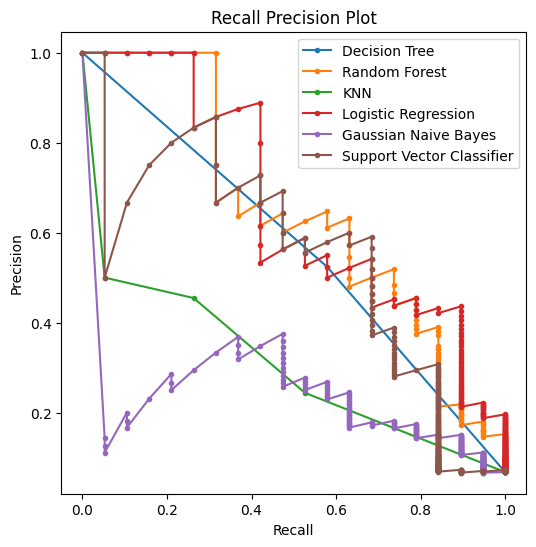

Decision Tree: AUC = 0.566
Random Forest: AUC = 0.642
K Nearest Neighbors: AUC = 0.306
Logistic Regression: AUC = 0.655
Gaussian Naive Bayes: AUC = 0.240
Support Vector Classifier: AUC = 0.542
----------------------------------------------------------------------------------------------------


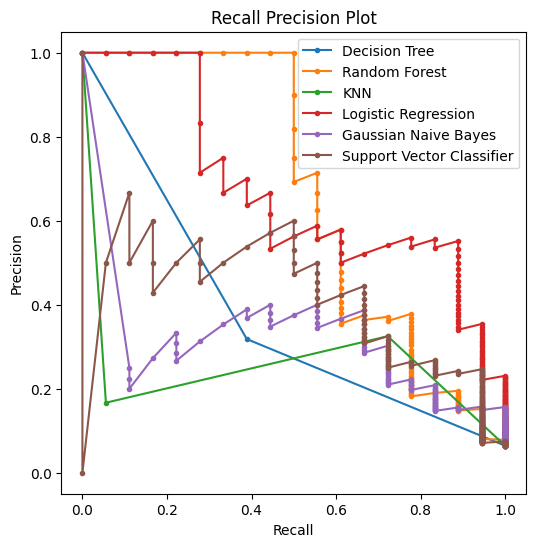

Decision Tree: AUC = 0.373
Random Forest: AUC = 0.666
K Nearest Neighbors: AUC = 0.250
Logistic Regression: AUC = 0.667
Gaussian Naive Bayes: AUC = 0.323
Support Vector Classifier: AUC = 0.402
----------------------------------------------------------------------------------------------------


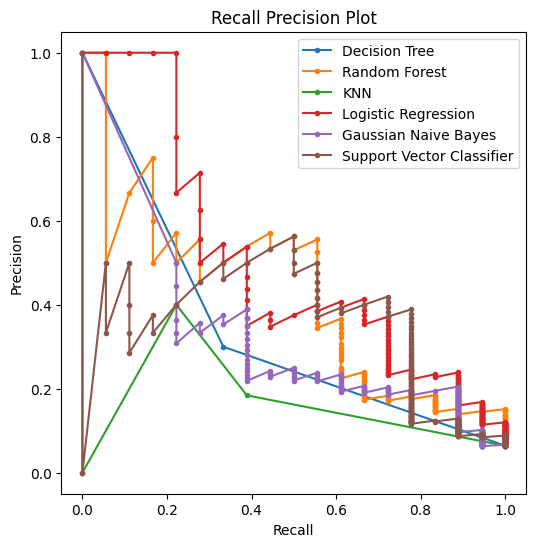

Decision Tree: AUC = 0.338
Random Forest: AUC = 0.420
K Nearest Neighbors: AUC = 0.169
Logistic Regression: AUC = 0.499
Gaussian Naive Bayes: AUC = 0.340
Support Vector Classifier: AUC = 0.349
----------------------------------------------------------------------------------------------------


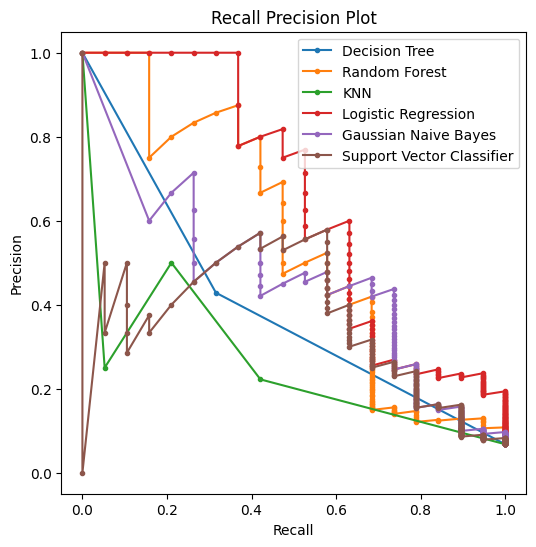

Decision Tree: AUC = 0.395
Random Forest: AUC = 0.547
K Nearest Neighbors: AUC = 0.252
Logistic Regression: AUC = 0.646
Gaussian Naive Bayes: AUC = 0.459
Support Vector Classifier: AUC = 0.351
----------------------------------------------------------------------------------------------------


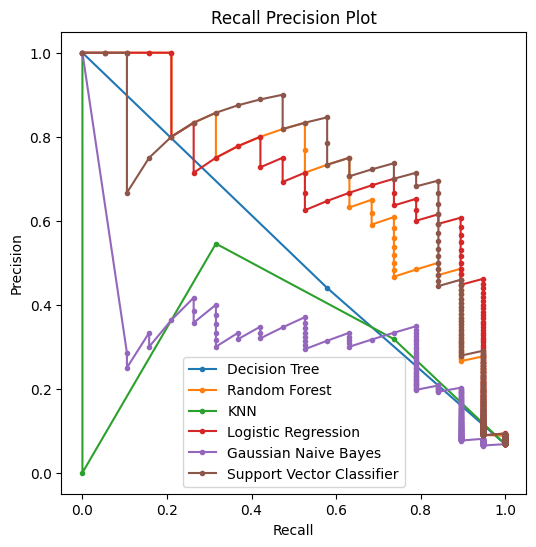

Decision Tree: AUC = 0.524
Random Forest: AUC = 0.703
K Nearest Neighbors: AUC = 0.319
Logistic Regression: AUC = 0.716
Gaussian Naive Bayes: AUC = 0.325
Support Vector Classifier: AUC = 0.730
----------------------------------------------------------------------------------------------------
Decision Tree: Mean AUC = 0.439
Random Forest: Mean AUC = 0.596
K Nearest Neighbors: Mean AUC = 0.259
Logistic Regression: Mean AUC = 0.637
Gaussian Naive Bayes: Mean AUC = 0.337
Support Vector Classifier: Mean AUC = 0.475


In [58]:
from sklearn.metrics import auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

#These are to save each Area Under Curve for each model, so we can see the mean
dt_aucs = []
rf_aucs = []
knn_aucs = []
lr_aucs = []
gnb_aucs = []
svc_aucs = []

opening_weekend_ss = StandardScaler()
domestic_gross_ss = StandardScaler()
foreign_gross_ss = StandardScaler()
worldwide_gross_ss = StandardScaler()
budget_ss = StandardScaler()
# We will do KFold validation to ensure we are not overfitting the model
# also we use stratified because the True/False ratio is 7:100, which means that if we didn't use the stratify strategy, 
# it would be very likely that none of the training data would be of class True, and the model would be just classifying everything as false
cv = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    # Set the train and test sets
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]
    
    # We need to scale the data inside the validation loop, so we don't leak any information about the test part of the dataset
    train_X.loc[:,"OPENING_WEEKEND"] = opening_weekend_ss.fit_transform(train_X[['OPENING_WEEKEND']])
    train_X.loc[:,"DOMESTIC_GROSS"] = domestic_gross_ss.fit_transform(train_X[['DOMESTIC_GROSS']])
    train_X.loc[:,"FOREIGN_GROSS"] = foreign_gross_ss.fit_transform(train_X[['FOREIGN_GROSS']])
    train_X.loc[:,"WORLDWIDE_GROSS"] = worldwide_gross_ss.fit_transform(train_X[['WORLDWIDE_GROSS']])
    train_X.loc[:,"BUDGET"] = budget_ss.fit_transform(train_X[['BUDGET']])   
    
    # Transform the test data with the fitted scaler
    test_X.loc[:,"OPENING_WEEKEND"] = opening_weekend_ss.transform(test_X[['OPENING_WEEKEND']])
    test_X.loc[:,"DOMESTIC_GROSS"] = domestic_gross_ss.transform(test_X[['DOMESTIC_GROSS']])
    test_X.loc[:,"FOREIGN_GROSS"] = foreign_gross_ss.transform(test_X[['FOREIGN_GROSS']])
    test_X.loc[:,"WORLDWIDE_GROSS"] = worldwide_gross_ss.transform(test_X[['WORLDWIDE_GROSS']])
    test_X.loc[:,"BUDGET"] = budget_ss.transform(test_X[['BUDGET']])

    

    
    # Fit every model
    dt.fit(train_X, train_y)
    rf.fit(train_X, train_y)
    knn.fit(train_X, train_y)
    lr.fit(train_X, train_y)
    gnb.fit(train_X, train_y)
    svc.fit(train_X, train_y)

    # Get the prediction the model made (in probabilities, not class)
    dt_probs = dt.predict_proba(test_X)
    rf_probs = rf.predict_proba(test_X)
    knn_probs = knn.predict_proba(test_X)
    lr_probs = lr.predict_proba(test_X)
    gnb_probs = gnb.predict_proba(test_X)
    svc_probs = svc.predict_proba(test_X)

    # Get the probability for the class True
    dt_probs = dt_probs[:, 1]
    rf_probs = rf_probs[:, 1]
    knn_probs = knn_probs[:, 1]
    lr_probs = lr_probs[:, 1]
    gnb_probs = gnb_probs[:, 1]
    svc_probs = svc_probs[:, 1]
    #Get all the precisions and recalls
    dt_precision, dt_recall, _ = precision_recall_curve(test_y, dt_probs)
    rf_precision, rf_recall, _ = precision_recall_curve(test_y, rf_probs)
    knn_precision, knn_recall, _ = precision_recall_curve(test_y, knn_probs)
    lr_precision, lr_recall, _ = precision_recall_curve(test_y, lr_probs)
    gnb_precision, gnb_recall, _ = precision_recall_curve(test_y, gnb_probs)
    svc_precision, svc_recall, _ = precision_recall_curve(test_y, svc_probs)
    
    # Get the area under the curve for all the precision/recall curves
    dt_auc = auc(dt_recall,dt_precision)
    rf_auc = auc(rf_recall,rf_precision)
    knn_auc = auc(knn_recall,knn_precision)
    lr_auc = auc(lr_recall,lr_precision)
    gnb_auc = auc(gnb_recall,gnb_precision)
    svc_auc = auc(svc_recall,svc_precision)
    
    # Saving the Areas Under Curve for each model
    dt_aucs.append(dt_auc)
    rf_aucs.append(rf_auc)
    knn_aucs.append(knn_auc)
    lr_aucs.append(lr_auc)
    gnb_aucs.append(gnb_auc)
    svc_aucs.append(svc_auc)
    
    # Plot all the recall/precision curves and 
    plt.figure(figsize=(6, 6))
    plt.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
    plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest' )
    plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
    plt.plot(gnb_recall, gnb_precision, marker='.', label='Gaussian Naive Bayes')
    plt.plot(svc_recall, svc_precision, marker='.', label='Support Vector Classifier')
    
    plt.title('Recall Precision Plot')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.show()
    print(f"Decision Tree: AUC = {dt_auc:.3f}")
    print(f"Random Forest: AUC = {rf_auc:.3f}")
    print(f"K Nearest Neighbors: AUC = {knn_auc:.3f}")
    print(f"Logistic Regression: AUC = {lr_auc:.3f}")
    print(f"Gaussian Naive Bayes: AUC = {gnb_auc:.3f}")
    print(f"Support Vector Classifier: AUC = {svc_auc:.3f}")
    print('-' * 100)


print(f"Decision Tree: Mean AUC = {np.mean(dt_aucs):.3f}")
print(f"Random Forest: Mean AUC = {np.mean(rf_aucs):.3f}")
print(f"K Nearest Neighbors: Mean AUC = {np.mean(knn_aucs):.3f}")
print(f"Logistic Regression: Mean AUC = {np.mean(lr_aucs):.3f}")
print(f"Gaussian Naive Bayes: Mean AUC = {np.mean(gnb_aucs):.3f}")
print(f"Support Vector Classifier: Mean AUC = {np.mean(svc_aucs):.3f}")


### The results on the plots and Mean AUCs above are not very desirable, both are very low. But why is this happening? Let's train a single model and see the confusion matrix and classification report to see if something seems wrong.

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X,y)
lr.fit(train_X,train_y)
y_pred = lr.predict(test_X)

print(confusion_matrix(test_y, y_pred))
print('-'*100)
print(classification_report(test_y,y_pred))

[[322   9]
 [ 16   4]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       331
        True       0.31      0.20      0.24        20

    accuracy                           0.93       351
   macro avg       0.63      0.59      0.60       351
weighted avg       0.92      0.93      0.92       351


### We can observe that while the precision and the recall for the False class is very high, the same cannot be said for the True class. This is because there is a massive imbalance in the classes of the data. And because of the imbalance of the classes, the loss will prioritize to classify the majority data to get the best score. As we are trying to guess if a movie will get an Oscar, we need to have high precision and recall in both classes. 

Text(0.5, 1.0, 'Percentage of Each class in the Dataset')

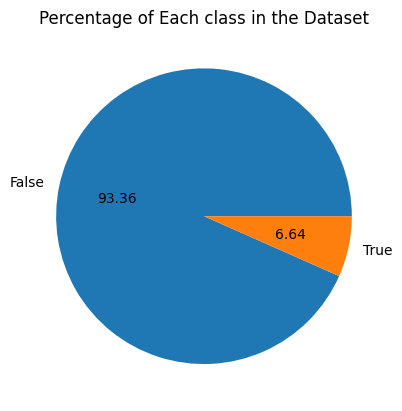

In [60]:
ax = y.value_counts().plot.pie(autopct='%.2f')
ax.set_ylabel('')
ax.set_title('Percentage of Each class in the Dataset')

## There are multiple ways to deal with this problem
- Undersampling
- Oversampling
### I believe that the dataset is too small to undersample, so we will have to go with the other choice
### Following <a href="https://imbalanced-learn.org/stable/over_sampling.html">this tutorial</a> I chose to go with simple SMOTE as the transformed dataset only has numerical values (the multiple-hot encoding counts as a numerical value)

Text(0.5, 1.0, 'Percentage of Each class in the Dataset')

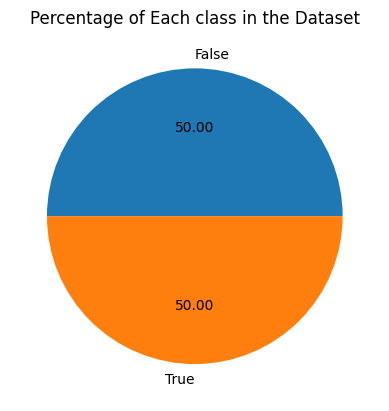

In [61]:
from imblearn.over_sampling import SMOTE
X_resampled,y_resampled = SMOTE().fit_resample(X,y)
ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
ax.set_ylabel('')
ax.set_title('Percentage of Each class in the Dataset')

### Now that the classes are balanced, let's run the test on the classifiers again.

In [62]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

class_weights = None
dt = DecisionTreeClassifier(class_weight=class_weights)
rf = RandomForestClassifier(n_estimators=1000,class_weight=class_weights)
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000,class_weight=class_weights)
gnb = GaussianNB()
svc = SVC(probability=True,class_weight=class_weights)

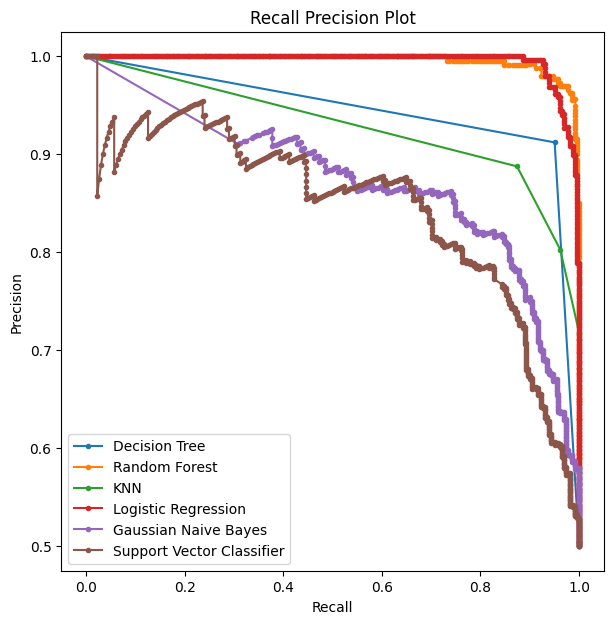

Decision Tree: AUC = 0.944
Random Forest: AUC = 0.996
K Nearest Neighbors: AUC = 0.928
Logistic Regression: AUC = 0.995
Gaussian Naive Bayes: AUC = 0.872
Support Vector Classifier: AUC = 0.846
----------------------------------------------------------------------------------------------------


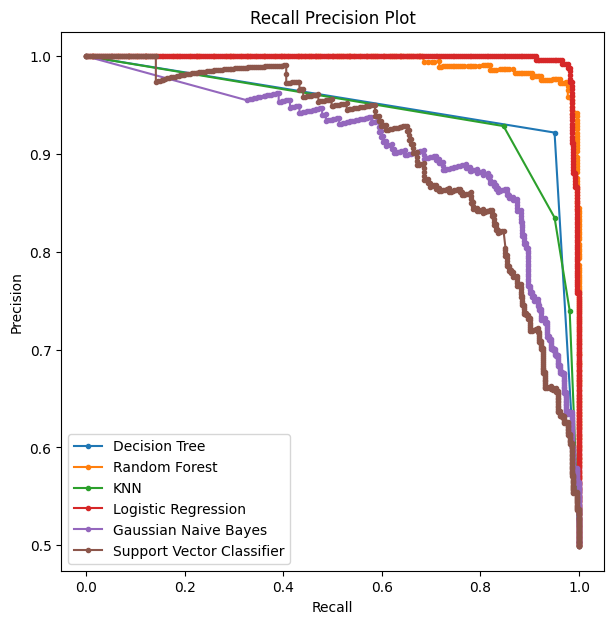

Decision Tree: AUC = 0.948
Random Forest: AUC = 0.994
K Nearest Neighbors: AUC = 0.944
Logistic Regression: AUC = 0.997
Gaussian Naive Bayes: AUC = 0.910
Support Vector Classifier: AUC = 0.909
----------------------------------------------------------------------------------------------------


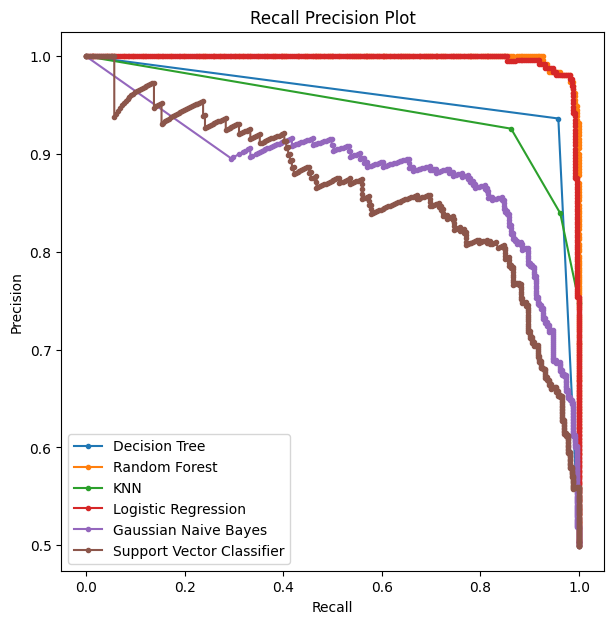

Decision Tree: AUC = 0.958
Random Forest: AUC = 0.998
K Nearest Neighbors: AUC = 0.948
Logistic Regression: AUC = 0.997
Gaussian Naive Bayes: AUC = 0.885
Support Vector Classifier: AUC = 0.865
----------------------------------------------------------------------------------------------------


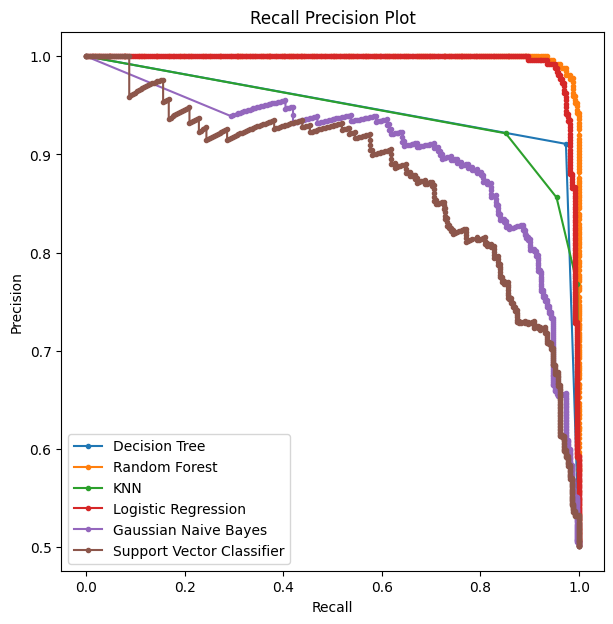

Decision Tree: AUC = 0.949
Random Forest: AUC = 0.999
K Nearest Neighbors: AUC = 0.946
Logistic Regression: AUC = 0.995
Gaussian Naive Bayes: AUC = 0.907
Support Vector Classifier: AUC = 0.879
----------------------------------------------------------------------------------------------------


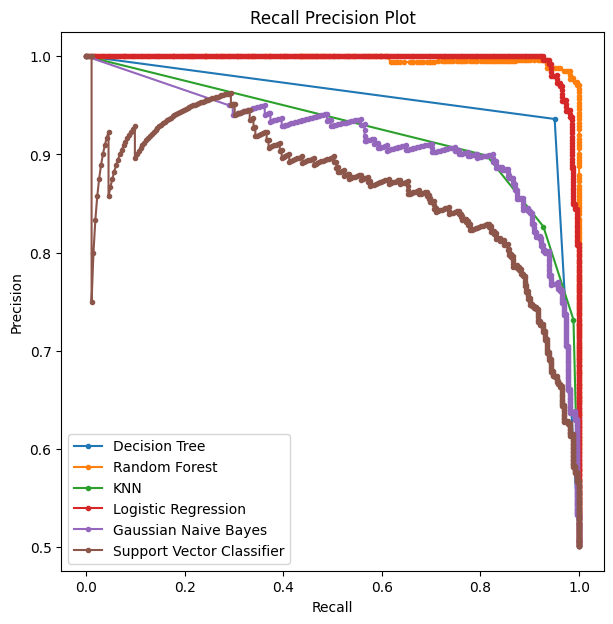

Decision Tree: AUC = 0.956
Random Forest: AUC = 0.997
K Nearest Neighbors: AUC = 0.925
Logistic Regression: AUC = 0.996
Gaussian Naive Bayes: AUC = 0.916
Support Vector Classifier: AUC = 0.866
----------------------------------------------------------------------------------------------------
Decision Tree: Mean AUC = 0.951
Random Forest: Mean AUC = 0.997
K Nearest Neighbors: Mean AUC = 0.938
Logistic Regression: Mean AUC = 0.996
Gaussian Naive Bayes: Mean AUC = 0.898
Support Vector Classifier: Mean AUC = 0.873


In [63]:
from sklearn.metrics import auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

#These are to save each Area Under Curve for each model, so we can see the mean
dt_aucs = []
rf_aucs = []
knn_aucs = []
lr_aucs = []
gnb_aucs = []
svc_aucs = []
# We will do KFold validation to ensure we are not overfitting the model
# also we use stratified because the True/False ratio is 7:100, which means that if we didn't use the stratify strategy, it would be very likely that none of the training data would be of class True, and the model would be just classifying everything as false
cv = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_index, test_index) in enumerate(cv.split(X_resampled, y_resampled)):
    # Set the train and test sets
    train_X = X_resampled.iloc[train_index]
    train_y = y_resampled.iloc[train_index]
    test_X = X_resampled.iloc[test_index]
    test_y = y_resampled.iloc[test_index]
    
    
    # We need to scale the data inside the validation loop, so we don't leak any information about the test part of the dataset
    train_X.loc[:,"OPENING_WEEKEND"] = opening_weekend_ss.fit_transform(train_X[['OPENING_WEEKEND']])
    train_X.loc[:,"DOMESTIC_GROSS"] = domestic_gross_ss.fit_transform(train_X[['DOMESTIC_GROSS']])
    train_X.loc[:,"FOREIGN_GROSS"] = foreign_gross_ss.fit_transform(train_X[['FOREIGN_GROSS']])
    train_X.loc[:,"WORLDWIDE_GROSS"] = worldwide_gross_ss.fit_transform(train_X[['WORLDWIDE_GROSS']])
    train_X.loc[:,"BUDGET"] = budget_ss.fit_transform(train_X[['BUDGET']])   

    test_X.loc[:,"OPENING_WEEKEND"] = opening_weekend_ss.transform(test_X[['OPENING_WEEKEND']])
    test_X.loc[:,"DOMESTIC_GROSS"] = domestic_gross_ss.transform(test_X[['DOMESTIC_GROSS']])
    test_X.loc[:,"FOREIGN_GROSS"] = foreign_gross_ss.transform(test_X[['FOREIGN_GROSS']])
    test_X.loc[:,"WORLDWIDE_GROSS"] = worldwide_gross_ss.transform(test_X[['WORLDWIDE_GROSS']])
    test_X.loc[:,"BUDGET"] = budget_ss.transform(test_X[['BUDGET']])

    
    # Fit every model
    dt.fit(train_X, train_y)
    rf.fit(train_X, train_y)
    knn.fit(train_X, train_y)
    lr.fit(train_X, train_y)
    gnb.fit(train_X, train_y)
    svc.fit(train_X, train_y)

    # Get the prediction the model made (in probabilities, not class)
    dt_probs = dt.predict_proba(test_X)
    rf_probs = rf.predict_proba(test_X)
    knn_probs = knn.predict_proba(test_X)
    lr_probs = lr.predict_proba(test_X)
    gnb_probs = gnb.predict_proba(test_X)
    svc_probs = svc.predict_proba(test_X)

    # Get the probability for the class True
    dt_probs = dt_probs[:, 1]
    rf_probs = rf_probs[:, 1]
    knn_probs = knn_probs[:, 1]
    lr_probs = lr_probs[:, 1]
    gnb_probs = gnb_probs[:, 1]
    svc_probs = svc_probs[:, 1]
    #Get all the precisions and recalls
    dt_precision, dt_recall, _ = precision_recall_curve(test_y, dt_probs)
    rf_precision, rf_recall, _ = precision_recall_curve(test_y, rf_probs)
    knn_precision, knn_recall, _ = precision_recall_curve(test_y, knn_probs)
    lr_precision, lr_recall, _ = precision_recall_curve(test_y, lr_probs)
    gnb_precision, gnb_recall, _ = precision_recall_curve(test_y, gnb_probs)
    svc_precision, svc_recall, _ = precision_recall_curve(test_y, svc_probs)
    
    # Get the area under the curve for all the precision/recall curves
    dt_auc = auc(dt_recall,dt_precision)
    rf_auc = auc(rf_recall,rf_precision)
    knn_auc = auc(knn_recall,knn_precision)
    lr_auc = auc(lr_recall,lr_precision)
    gnb_auc = auc(gnb_recall,gnb_precision)
    svc_auc = auc(svc_recall,svc_precision)
    
    # Saving the Areas Under Curve for each model
    dt_aucs.append(dt_auc)
    rf_aucs.append(rf_auc)
    knn_aucs.append(knn_auc)
    lr_aucs.append(lr_auc)
    gnb_aucs.append(gnb_auc)
    svc_aucs.append(svc_auc)
    
    # Plot all the recall/precision curves and 
    plt.figure(figsize=(7, 7))
    plt.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
    plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest' )
    plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
    plt.plot(gnb_recall, gnb_precision, marker='.', label='Gaussian Naive Bayes')
    plt.plot(svc_recall, svc_precision, marker='.', label='Support Vector Classifier')
    
    plt.title('Recall Precision Plot')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.show()
    print(f"Decision Tree: AUC = {dt_auc:.3f}")
    print(f"Random Forest: AUC = {rf_auc:.3f}")
    print(f"K Nearest Neighbors: AUC = {knn_auc:.3f}")
    print(f"Logistic Regression: AUC = {lr_auc:.3f}")
    print(f"Gaussian Naive Bayes: AUC = {gnb_auc:.3f}")
    print(f"Support Vector Classifier: AUC = {svc_auc:.3f}")
    print('-' * 100)


print(f"Decision Tree: Mean AUC = {np.mean(dt_aucs):.3f}")
print(f"Random Forest: Mean AUC = {np.mean(rf_aucs):.3f}")
print(f"K Nearest Neighbors: Mean AUC = {np.mean(knn_aucs):.3f}")
print(f"Logistic Regression: Mean AUC = {np.mean(lr_aucs):.3f}")
print(f"Gaussian Naive Bayes: Mean AUC = {np.mean(gnb_aucs):.3f}")
print(f"Support Vector Classifier: Mean AUC = {np.mean(svc_aucs):.3f}")



### We can see that Logistic Regression and Random Forest have the best Mean Area Under the Curve. I will use both and check the prediction between them to make the final decision.

### Let's import the anonymous validation data for the assignment and fit them to the train data
#### To do this, we will follow each step we did on <a href="#A)-Data-Preprocessing">Part 1</a>.

In [64]:
anon_df = pd.read_excel('./data/movies_test_anon_sample.xlsx')
anon_df.head()

,ID,Film,Year,Script Type,Rotten Tomatoes critics,Metacritic critics,Average critics,Rotten Tomatoes Audience,Metacritic Audience,Rotten Tomatoes vs Metacritic deviance,Average audience,Audience vs Critics deviance,Primary Genre,Genre,Opening Weekend,Opening weekend ($million),Domestic Gross,Domestic gross ($million),Foreign Gross ($million),Foreign Gross,Worldwide Gross,Worldwide Gross ($million),of Gross earned abroad,Budget ($million),Budget recovered,Budget recovered opening weekend,Distributor,IMDb Rating,IMDB vs RT disparity,Release Date (US)
0,1,???,2019,original screenplay,73,-,-,80,-,-,-,-,NaN,action,21000000,21,3640355,3.6,62.5,62525155,66165510,66.2,94.4,21,315.07%,100.00%,Yash Raj Films,6.5,15.0,"October 2, 2019"
1,2,???,2022,NaN,40,-,40,84,-,-,84,-44,comedy,family,1399373,1.4,3973263,4.0,-,-,-,-,-,-,-,-,Roadside Attraction,4.9,35.0,NaN
2,3,???,2019,sequel,32,40,36,94,66,28,80,-44,NaN,comedy,8901419,8.9,21360215,21.4,0,0,21360215,21.4,0.0,44,48.55%,20.23%,Warner Bros. Pictures,6.4,30.0,"June 14, 2019"
3,4,???,2022,NaN,70,60,65,73,66,7,70,-5,drama,"fantasy, romance",2919717,2.9,8286741,8.3,13.0,12959213,21245954,21.2,61.00%,60.0,35.41%,4.87%,Roadshow Entertainment,6.7,6.0,NaN
4,5,???,2018,remake,86,42,64,70,44,26,57,7,NaN,"romance, comedy",14711101,14.7,50316123,50.0,41,40928790,91244913,912,44.86%,12,760.37%,122.59%,NaN,NaN,NaN,"May 4, 2018"


In [65]:
# In addition to the columns we dropped on the preprocessing part, we also drop `ID` and `Film` because they are not needed
anon_df.drop(columns=['Average critics ', 'Rotten Tomatoes vs Metacritic  deviance',
       'Average audience ', 'Audience vs Critics deviance ','Opening weekend ($million)','Domestic gross ($million)',
       'Foreign Gross ($million)','Worldwide Gross ($million)', ' of Gross earned abroad', ' Budget recovered',' Budget recovered opening weekend','Primary Genre','Distributor','ID','Film'],inplace=True)

In [66]:
anon_df.columns = [x.upper().strip() for x in anon_df.columns]
try:
       anon_df.rename(columns=
        {
         'YEAR': 'RELEASE_YEAR',
         'SCRIPT TYPE': 'SCRIPT_TYPE',
         'ROTTEN TOMATOES  CRITICS': 'RT_CRITICS',
         'METACRITIC  CRITICS': 'MC_CRITICS',
         'ROTTEN TOMATOES AUDIENCE': 'RT_AUDIENCE',
         'METACRITIC AUDIENCE': 'MC_AUDIENCE',
         'OPENING WEEKEND': 'OPENING_WEEKEND',
         'DOMESTIC GROSS': 'DOMESTIC_GROSS',
         'FOREIGN GROSS': 'FOREIGN_GROSS',
         'WORLDWIDE GROSS': 'WORLDWIDE_GROSS',
         'BUDGET ($MILLION)': 'BUDGET',
         'IMDB RATING': 'IMDB_RATING',
         'IMDB VS RT DISPARITY': 'IMDB_RT_DIFFERENCE'},
               inplace=True)
except Exception as e:
     print(e)

In [67]:
anon_df.head()

,RELEASE_YEAR,SCRIPT_TYPE,RT_CRITICS,MC_CRITICS,RT_AUDIENCE,MC_AUDIENCE,GENRE,OPENING_WEEKEND,DOMESTIC_GROSS,FOREIGN_GROSS,WORLDWIDE_GROSS,BUDGET,IMDB_RATING,IMDB_RT_DIFFERENCE,RELEASE DATE (US)
0,2019,original screenplay,73,-,80,-,action,21000000,3640355,62525155,66165510,21,6.5,15.0,"October 2, 2019"
1,2022,NaN,40,-,84,-,family,1399373,3973263,-,-,-,4.9,35.0,NaN
2,2019,sequel,32,40,94,66,comedy,8901419,21360215,0,21360215,44,6.4,30.0,"June 14, 2019"
3,2022,NaN,70,60,73,66,"fantasy, romance",2919717,8286741,12959213,21245954,60.0,6.7,6.0,NaN
4,2018,remake,86,42,70,44,"romance, comedy",14711101,50316123,40928790,91244913,12,NaN,NaN,"May 4, 2018"


In [68]:
anon_df['IMDB_RATING'].unique()

array([6.5, 4.9, 6.4, 6.7, nan, 5.9, 5.5, 6.3, 5.6, 6.9, 7.3, 6. , 5.2,
       7.4, 7.1, 6.1, 6.8, 2.5, 7.6, 6.2, 7.5, 8.3, 5. , 5.4, 8.4, 7. ])

In [69]:
anon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RELEASE_YEAR        50 non-null     int64  
 1   SCRIPT_TYPE         33 non-null     object 
 2   RT_CRITICS          50 non-null     int64  
 3   MC_CRITICS          50 non-null     object 
 4   RT_AUDIENCE         50 non-null     int64  
 5   MC_AUDIENCE         50 non-null     object 
 6   GENRE               46 non-null     object 
 7   OPENING_WEEKEND     50 non-null     object 
 8   DOMESTIC_GROSS      50 non-null     int64  
 9   FOREIGN_GROSS       42 non-null     object 
 10  WORLDWIDE_GROSS     50 non-null     object 
 11  BUDGET              50 non-null     object 
 12  IMDB_RATING         35 non-null     float64
 13  IMDB_RT_DIFFERENCE  35 non-null     float64
 14  RELEASE DATE (US)   41 non-null     object 
dtypes: float64(2), int64(4), object(9)
memory usage: 6.0+ KB


In [70]:
anon_df['RT_CRITICS'] = anon_df['RT_CRITICS'].apply(lambda x: clean_general_float(x))
anon_df['RT_CRITICS'] = anon_df['RT_CRITICS'].fillna(df['RT_CRITICS'].mean())
anon_df['RT_CRITICS'] = anon_df['RT_CRITICS'].apply(lambda x: int(x))

anon_df['MC_CRITICS'] = anon_df['MC_CRITICS'].apply(lambda x: clean_general_float(x))
anon_df['MC_CRITICS'] = anon_df['MC_CRITICS'].fillna(df['MC_CRITICS'].mean())
anon_df['MC_CRITICS'] = anon_df['MC_CRITICS'].apply(lambda x: int(x))

anon_df['MC_AUDIENCE'] = anon_df['MC_AUDIENCE'].apply(lambda x: clean_general_float(x))
anon_df['MC_AUDIENCE'] = anon_df['MC_AUDIENCE'].fillna(df['MC_AUDIENCE'].mean())
anon_df['MC_AUDIENCE'] = anon_df['MC_AUDIENCE'].apply(lambda x: int(x))

anon_df['RT_AUDIENCE'] = anon_df['RT_AUDIENCE'].apply(lambda x: clean_general_float(x))
anon_df['RT_AUDIENCE'] = anon_df['RT_AUDIENCE'].fillna(df['RT_AUDIENCE'].mean())
anon_df['RT_AUDIENCE'] = anon_df['RT_AUDIENCE'].apply(lambda x: int(x))

anon_df['OPENING_WEEKEND'] = anon_df['OPENING_WEEKEND'].apply(lambda x: clean_general_float(x))
anon_df['OPENING_WEEKEND'] = anon_df['OPENING_WEEKEND'].fillna(df['OPENING_WEEKEND'].mean())

anon_df['DOMESTIC_GROSS'] = anon_df['DOMESTIC_GROSS'].apply(lambda x: clean_general_float(x))
anon_df['DOMESTIC_GROSS'] = anon_df['DOMESTIC_GROSS'].fillna(df['DOMESTIC_GROSS'].mean())

anon_df['FOREIGN_GROSS'] = anon_df['FOREIGN_GROSS'].apply(lambda x: clean_general_float(x))
anon_df['FOREIGN_GROSS'] = anon_df['FOREIGN_GROSS'].fillna(df['FOREIGN_GROSS'].mean())

anon_df['WORLDWIDE_GROSS'] = anon_df['WORLDWIDE_GROSS'].apply(lambda x: clean_general_float(x))
anon_df['WORLDWIDE_GROSS'] = anon_df['WORLDWIDE_GROSS'].fillna(df['WORLDWIDE_GROSS'].mean())

anon_df['BUDGET'] = anon_df['BUDGET'].apply(lambda x: clean_general_float(x) * 1_000_000)
anon_df['BUDGET'] = anon_df['BUDGET'].fillna(df['BUDGET'].mean())

temp_date = pd.to_datetime(anon_df['RELEASE DATE (US)'], format='mixed')
anon_df['RELEASE_MONTH'] = temp_date.dt.month
anon_df['RELEASE_DAY'] = temp_date.dt.day

# We drop the original column because we don't need it anymore.
anon_df = anon_df.drop(columns="RELEASE DATE (US)")
anon_df['RELEASE_MONTH'] = anon_df['RELEASE_MONTH'].fillna(round(df['RELEASE_MONTH']))
anon_df['RELEASE_DAY'] = anon_df['RELEASE_DAY'].fillna(round(df['RELEASE_DAY']))

anon_df['IMDB_RATING'] = anon_df['IMDB_RATING'].apply(lambda x: x*10)
anon_df['IMDB_RATING'] = anon_df['IMDB_RATING'].fillna(df['IMDB_RATING'].mean())

nan_imdb_rt_df = anon_df[anon_df['IMDB_RT_DIFFERENCE'].isna()]
anon_df.loc[anon_df['IMDB_RT_DIFFERENCE'].isna(), 'IMDB_RT_DIFFERENCE'] = (
        nan_imdb_rt_df['IMDB_RATING'] - nan_imdb_rt_df['RT_CRITICS'])

anon_df['SCRIPT_TYPE'] = anon_df['SCRIPT_TYPE'].fillna('-')
anon_df['GENRE'] = anon_df['GENRE'].fillna('-')


### We also need to fix the categorical columns for `anon_df` , refer to <a href="#Categorical-Columns">this part</a>

In [71]:

anon_df['SCRIPT_TYPE'] = anon_df['SCRIPT_TYPE'].apply(lambda x: x.upper())
anon_df['SCRIPT_TYPE'] = anon_df['SCRIPT_TYPE'].apply(lambda x: x.strip())
anon_df['SCRIPT_TYPE'] = anon_df['SCRIPT_TYPE'].apply(lambda x: x.replace('REMAKE / REBOOT', 'REMAKE'))


anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.upper())
anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.strip())
anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('.', ','))
anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.rstrip(','))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('II', 'I'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('THRILER', 'THRILLER'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('SPORTS', 'SPORT'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('MUSICAL', 'MUSIC'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('MUSIC', 'MUSICAL'))

anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('HORROR', 'HORRO'))
anon_df['GENRE'] = anon_df['GENRE'].apply(lambda x: x.replace('HORRO', 'HORROR'))

In [72]:
get_unique_genres(anon_df)

{'-',
 'ACTION',
 'ADVENTURE',
 'ANIMATION',
 'COMEDY',
 'CRIME',
 'DRAMA',
 'FAMILY',
 'FANTASY',
 'HISTORY',
 'HORROR',
 'MUSICAL',
 'MYSTERY',
 'ROMANCE',
 'SCI-FI',
 'SPORT',
 'SUSPENSE',
 'THRILLER'}

In [73]:
get_unique_script_types(anon_df)

{'-',
 'ADAPTATION',
 'BASED ON A TRUE STORY',
 'ORIGINAL SCREENPLAY',
 'REMAKE',
 'SEQUEL'}

In [74]:
script_types = []
for col in df.columns:
    if col.startswith("SCRIPT_"):
        script_types.append(col.split('_')[1])
        
script_types

['ADAPTATION',
 'REMAKE',
 'ORIGINAL',
 'SEQUEL',
 'BASED',
 'DOCUMENTARY',
 'PREQUEL']

In [75]:
genres = []
for col in df.columns:
    if col.startswith('GENRE_'):
        genres.append(col.split('_')[1])
        
genres

['PERIOD',
 'ACTION',
 'WESTERN',
 'HORROR',
 'MUSICAL',
 'SCI-FI',
 'FAMILY',
 'COMEDY',
 'CRIME',
 'DRAMA',
 'ANIMATION',
 'SPORT',
 'WAR',
 'THRILLER',
 'FANTASY',
 'ADVENTURE',
 'ROMANTIC',
 'ROMANCE',
 'DOCUMENTARY',
 'BIOGRAPHY',
 'HISTORY',
 'MYSTERY']